In [31]:
%load_ext IPython.extensions.autoreload
%autoreload 2

The IPython.extensions.autoreload extension is already loaded. To reload it, use:
  %reload_ext IPython.extensions.autoreload


In [32]:
import sys
sys.path.append('../..')
from model import FinData
from model import merged_split
from model import CatboostFinModel

In [33]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt

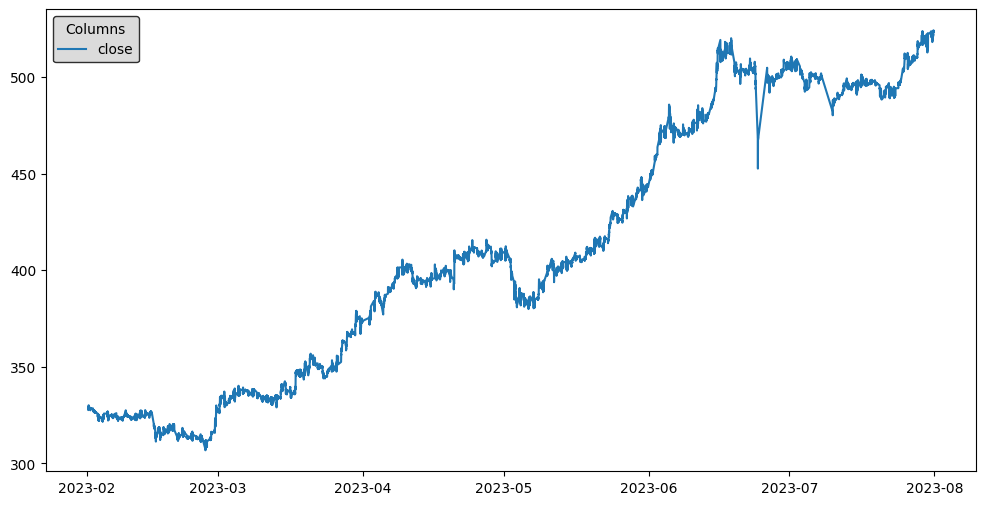

In [16]:
data = FinData("./datasets/Sber_10_min.csv")
data.visualize_time_frame(datetime_start=dt.datetime(2023, 2, 1), 
                          datetime_end=dt.datetime(2023, 8, 1), 
                          columns=["close"])

In [17]:
windows_shifts_norms = [2, 3, 4, 5, 6]
windows_ma = [2, 4, 6, 8, 18, 30, 50]
windows_ema = [3, 5, 7, 9, 20, 35, 100]


data.insert_shifts_norms(windows_shifts_norms=windows_shifts_norms)
data.insert_rolling_means(windows_ma=windows_ma)
data.insert_exp_rolling_means(windows_ema=windows_ema)
data.insert_bollinger()
data.insert_rsi()
data.insert_high_low_diff()
data.insert_stochastic_oscillator()
data.insert_random_prediction()

num = data.numeric_features

In [18]:
X_train, X_val, y_train, y_val = merged_split(data=data.df, start_data=dt.datetime(2023, 2, 1), 
                                                            num_train_candles=3000, 
                                                            num_valid_candles=100, 
                                                            numeric=num, target="direction_binary")

In [19]:
numeric = data.get_numeric_features()
cat = data.get_cat_features()

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.03, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 2000}

In [20]:
model = CatboostFinModel(args = args)

model.set_datasets(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val)
model.set_features(numeric_features=numeric, cat_features=cat)

model.fit()

0:	learn: 0.6911883	test: 0.6902785	best: 0.6902785 (0)	total: 13.1ms	remaining: 2m 11s
1:	learn: 0.6893549	test: 0.6876677	best: 0.6876677 (1)	total: 26.2ms	remaining: 2m 10s
2:	learn: 0.6876093	test: 0.6851369	best: 0.6851369 (2)	total: 38ms	remaining: 2m 6s
3:	learn: 0.6860623	test: 0.6830479	best: 0.6830479 (3)	total: 50.6ms	remaining: 2m 6s
4:	learn: 0.6846162	test: 0.6808519	best: 0.6808519 (4)	total: 60.6ms	remaining: 2m 1s
5:	learn: 0.6830192	test: 0.6786752	best: 0.6786752 (5)	total: 72.5ms	remaining: 2m
6:	learn: 0.6816349	test: 0.6770307	best: 0.6770307 (6)	total: 86.8ms	remaining: 2m 3s
7:	learn: 0.6803842	test: 0.6750722	best: 0.6750722 (7)	total: 105ms	remaining: 2m 11s
8:	learn: 0.6792069	test: 0.6734445	best: 0.6734445 (8)	total: 119ms	remaining: 2m 12s
9:	learn: 0.6780513	test: 0.6717605	best: 0.6717605 (9)	total: 132ms	remaining: 2m 11s
10:	learn: 0.6768850	test: 0.6700449	best: 0.6700449 (10)	total: 141ms	remaining: 2m 8s
11:	learn: 0.6758518	test: 0.6687261	best: 0.

In [24]:
model.score(X_val, y_val)

              precision    recall  f1-score   support

           0       0.65      0.79      0.71       273
           1       0.66      0.50      0.57       227

    accuracy                           0.66       500
   macro avg       0.66      0.64      0.64       500
weighted avg       0.66      0.66      0.65       500



In [25]:
model.print_constant_accuracy(y_val)

Точность константного предсказания 0.546


In [23]:
stop

NameError: name 'stop' is not defined

In [9]:
windows_shifts_norms = [2, 3, 4, 5, 6]
windows_ma = [2, 4, 6, 8, 18, 30, 50]
windows_ema = [3, 5, 7, 9, 20, 35, 100]


data.insert_shifts_norms(windows_shifts_norms=windows_shifts_norms)
data.insert_rolling_means(windows_ma=windows_ma)
data.insert_exp_rolling_means(windows_ema=windows_ema)
data.insert_bollinger()
data.insert_rsi()
data.insert_high_low_diff()
data.insert_stochastic_oscillator()
data.insert_random_prediction()

num = data.numeric_features

KeyboardInterrupt: 

In [34]:
data = FinData("./datasets/T_yandex_10min.csv")

FileNotFoundError: [Errno 2] No such file or directory: './datasets/T_yandex_10min.csv'

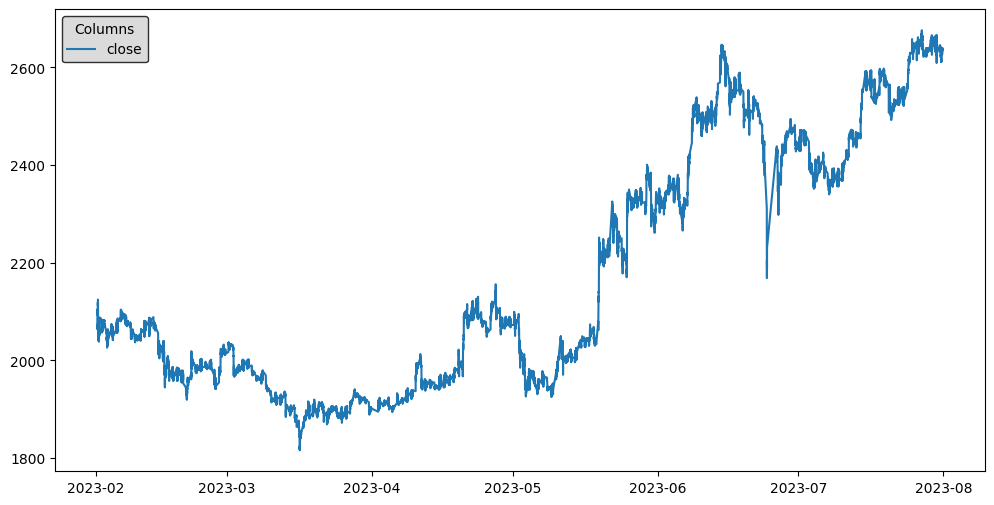

In [63]:
data.visualize_time_frame(datetime_start=dt.datetime(2023, 2, 1), 
                          datetime_end=dt.datetime(2023, 8, 1), 
                          columns=["close"])

In [35]:
windows_shifts_norms = [2, 3, 4, 5, 6]
windows_ma = [2, 4, 6, 8, 18, 30, 50]
windows_ema = [3, 5, 7, 9, 20, 35, 100]


data.insert_shifts_norms(windows_shifts_norms=windows_shifts_norms)
data.insert_rolling_means(windows_ma=windows_ma)
data.insert_exp_rolling_means(windows_ema=windows_ema)
data.insert_bollinger()
data.insert_rsi()
data.insert_high_low_diff()
data.insert_stochastic_oscillator()
data.insert_random_prediction()

num = data.numeric_features

In [71]:
X_train, X_val, X_test, y_train, y_val, y_test = merged_split(data=data.df, start_data=dt.datetime(2023, 2, 1), 
                                                            num_train_candles=3000, 
                                                            num_valid_candles=100, 
                                                            num_test_candles=10,
                                                            numeric=num, target="direction_binary")

In [72]:
numeric = data.get_numeric_features()
cat = data.get_cat_features()

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.01, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 2000}

In [73]:
model = CatboostFinModel(args = args)

model.set_datasets(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val)
model.set_features(numeric_features=numeric, cat_features=cat)

In [74]:
model.fit()

0:	learn: 0.6925929	test: 0.6925559	best: 0.6925559 (0)	total: 40.6ms	remaining: 6m 45s
1:	learn: 0.6920052	test: 0.6919253	best: 0.6919253 (1)	total: 71.6ms	remaining: 5m 57s
2:	learn: 0.6914427	test: 0.6913161	best: 0.6913161 (2)	total: 104ms	remaining: 5m 47s
3:	learn: 0.6909383	test: 0.6906975	best: 0.6906975 (3)	total: 124ms	remaining: 5m 9s
4:	learn: 0.6904553	test: 0.6901242	best: 0.6901242 (4)	total: 137ms	remaining: 4m 34s
5:	learn: 0.6899637	test: 0.6895401	best: 0.6895401 (5)	total: 154ms	remaining: 4m 15s
6:	learn: 0.6895067	test: 0.6890600	best: 0.6890600 (6)	total: 168ms	remaining: 4m
7:	learn: 0.6890366	test: 0.6886136	best: 0.6886136 (7)	total: 184ms	remaining: 3m 49s
8:	learn: 0.6885952	test: 0.6881648	best: 0.6881648 (8)	total: 201ms	remaining: 3m 43s
9:	learn: 0.6881397	test: 0.6876859	best: 0.6876859 (9)	total: 226ms	remaining: 3m 45s
10:	learn: 0.6877071	test: 0.6872034	best: 0.6872034 (10)	total: 251ms	remaining: 3m 47s
11:	learn: 0.6872664	test: 0.6867873	best: 0

In [75]:
model.score(X_val, y_val)

              precision    recall  f1-score   support

           0       0.63      0.73      0.67       255
           1       0.66      0.55      0.60       245

    accuracy                           0.64       500
   macro avg       0.64      0.64      0.64       500
weighted avg       0.64      0.64      0.64       500



In [76]:
model.print_constant_accuracy(y_val)

Точность константного предсказания 0.51


In [78]:
model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.68      0.56      0.61        27
           1       0.57      0.70      0.63        23

    accuracy                           0.62        50
   macro avg       0.63      0.63      0.62        50
weighted avg       0.63      0.62      0.62        50



In [77]:
model.print_constant_accuracy(y_test)

Точность константного предсказания 0.54


In [15]:
model.print_feature_importances()

0.41570612919594147 close_norms_5
0.4842763296111416 close_high_norms_3
0.5071528044858322 close_norms_3
0.5154882672499465 close_high_norms_5
0.5366270803195864 low_normed_ma_30
0.5669775175464331 rsi_3
0.5757824170118958 close_norms_6
0.624031574107176 rsi_18
0.6308435277583216 close_high_norms_4
0.640610348922762 close_high_norms_6
0.6569108262996001 low_normed_ma_18
0.6684060232484462 SD
0.6832865997035814 low_normed_ma_16
0.7009132065731948 high_normed_ma_30
0.707304389010009 stochastic_oscillator_ma_3
0.7225530341801787 close_norms_4
0.7287551045453653 low_normed_ma_50
0.7846472366151499 hl_diff_18
0.8140957648881243 high_normed_ma_16
0.8448118039898598 stochastic_oscillator_ma_6
0.8472764573178154 close_normed_ema_35
0.8475004580620309 close_normed_ema_20
0.8651633878488233 low_norms_5
0.8703193689706923 low_normed_ma_8
0.9179909399013048 close_normed_ema_9
0.9254735586624364 close_normed_hl_diff_18
0.9605589897462601 close_normed_rsi_18
0.9742029305466688 high_norms_3
0.9831549

In [80]:
X_train, X_val, y_train, y_val = merged_split(data=data.df, start_data=dt.datetime(2023, 2, 1), 
                                                            num_train_candles=3000, 
                                                            num_valid_candles=100,
                                                            numeric=num, target="direction_binary")

In [81]:
numeric = data.get_numeric_features()
cat = data.get_cat_features()

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.03, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 2000}

In [ ]:
model = CatboostFinModel(args = args)

model.set_datasets(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val)
model.set_features(numeric_features=numeric, cat_features=cat)

model.fit()

0:	learn: 0.6914515	test: 0.6921945	best: 0.6921945 (0)	total: 17.8ms	remaining: 2m 57s
1:	learn: 0.6898127	test: 0.6912502	best: 0.6912502 (1)	total: 34.2ms	remaining: 2m 51s
2:	learn: 0.6882563	test: 0.6902019	best: 0.6902019 (2)	total: 46.9ms	remaining: 2m 36s
3:	learn: 0.6869327	test: 0.6892330	best: 0.6892330 (3)	total: 64.1ms	remaining: 2m 40s
4:	learn: 0.6856835	test: 0.6884049	best: 0.6884049 (4)	total: 80.3ms	remaining: 2m 40s
5:	learn: 0.6843720	test: 0.6877614	best: 0.6877614 (5)	total: 101ms	remaining: 2m 47s
6:	learn: 0.6833121	test: 0.6869967	best: 0.6869967 (6)	total: 120ms	remaining: 2m 51s
7:	learn: 0.6822457	test: 0.6862154	best: 0.6862154 (7)	total: 137ms	remaining: 2m 50s
8:	learn: 0.6813612	test: 0.6854452	best: 0.6854452 (8)	total: 153ms	remaining: 2m 49s
9:	learn: 0.6803414	test: 0.6846276	best: 0.6846276 (9)	total: 170ms	remaining: 2m 50s
10:	learn: 0.6794379	test: 0.6840563	best: 0.6840563 (10)	total: 188ms	remaining: 2m 50s
11:	learn: 0.6786232	test: 0.6833459

In [83]:
model.score(X_val, y_val)

              precision    recall  f1-score   support

           0       0.61      0.74      0.67       262
           1       0.63      0.48      0.55       238

    accuracy                           0.62       500
   macro avg       0.62      0.61      0.61       500
weighted avg       0.62      0.62      0.61       500



In [ ]:
model.print_constant_accuracy(y_val)

Точность константного предсказания 0.524


In [ ]:
X_train, X_val, y_train, y_val = merged_split(data=data.df, start_data=dt.datetime(2023, 2, 1), 
                                                            num_train_candles=3000, 
                                                            num_valid_candles=100,
                                                            numeric=num, target="direction_binary")

numeric = data.get_numeric_features()
cat = data.get_cat_features()

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.03, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'CrossEntropy', 
        "eval_metric" : 'CrossEntropy', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 2000}


model = CatboostFinModel(args = args)

model.set_datasets(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val)
model.set_features(numeric_features=numeric, cat_features=cat)

model.fit()

0:	learn: 0.6914515	test: 0.6921945	best: 0.6921945 (0)	total: 17.6ms	remaining: 2m 56s
1:	learn: 0.6898127	test: 0.6912502	best: 0.6912502 (1)	total: 33ms	remaining: 2m 45s
2:	learn: 0.6882563	test: 0.6902019	best: 0.6902019 (2)	total: 45.4ms	remaining: 2m 31s
3:	learn: 0.6869327	test: 0.6892330	best: 0.6892330 (3)	total: 58.3ms	remaining: 2m 25s
4:	learn: 0.6856835	test: 0.6884049	best: 0.6884049 (4)	total: 70.9ms	remaining: 2m 21s
5:	learn: 0.6843720	test: 0.6877614	best: 0.6877614 (5)	total: 88.3ms	remaining: 2m 27s
6:	learn: 0.6833121	test: 0.6869967	best: 0.6869967 (6)	total: 100ms	remaining: 2m 23s
7:	learn: 0.6822457	test: 0.6862154	best: 0.6862154 (7)	total: 117ms	remaining: 2m 25s
8:	learn: 0.6813612	test: 0.6854452	best: 0.6854452 (8)	total: 132ms	remaining: 2m 26s
9:	learn: 0.6803414	test: 0.6846276	best: 0.6846276 (9)	total: 150ms	remaining: 2m 29s
10:	learn: 0.6794379	test: 0.6840563	best: 0.6840563 (10)	total: 167ms	remaining: 2m 31s
11:	learn: 0.6786232	test: 0.6833459	

In [90]:
model.score(X_val, y_val)

              precision    recall  f1-score   support

           0       0.61      0.74      0.67       262
           1       0.63      0.48      0.55       238

    accuracy                           0.62       500
   macro avg       0.62      0.61      0.61       500
weighted avg       0.62      0.62      0.61       500



In [91]:
from model.preprocessing import Scaler, scale_num_data

X_train, X_val = scale_num_data(X_train, [X_train, X_val], numeric=numeric, scaler=Scaler.Standard)

c:\Users\Валерия\OneDrive\Документы\GitHub\prices-predictions\myenv\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [47]:
X_train, X_val, X_test, y_train, y_val, y_test = merged_split(data=data.df, start_data=dt.datetime(2023, 2, 1), 
                                                            num_train_candles=3000, 
                                                            num_valid_candles=100,
                                                            num_test_candles=10, 
                                                            numeric=num, target="direction_binary")

In [51]:
numeric = data.get_numeric_features()
cat = data.get_cat_features()

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.03, 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'Logloss', 
        "eval_metric" : 'Logloss', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 2000}

In [52]:
model = CatboostFinModel(args = args)

model.set_datasets(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val)
model.set_features(numeric_features=numeric, cat_features=cat)

In [53]:
model.fit()

0:	learn: 0.6914166	test: 0.6927015	best: 0.6927015 (0)	total: 28.7ms	remaining: 4m 47s
1:	learn: 0.6896763	test: 0.6923796	best: 0.6923796 (1)	total: 51.1ms	remaining: 4m 15s
2:	learn: 0.6881918	test: 0.6920846	best: 0.6920846 (2)	total: 79.2ms	remaining: 4m 23s
3:	learn: 0.6868302	test: 0.6918524	best: 0.6918524 (3)	total: 103ms	remaining: 4m 18s
4:	learn: 0.6855642	test: 0.6915631	best: 0.6915631 (4)	total: 131ms	remaining: 4m 21s
5:	learn: 0.6842659	test: 0.6912089	best: 0.6912089 (5)	total: 150ms	remaining: 4m 9s
6:	learn: 0.6831511	test: 0.6909873	best: 0.6909873 (6)	total: 170ms	remaining: 4m 3s
7:	learn: 0.6820492	test: 0.6907310	best: 0.6907310 (7)	total: 187ms	remaining: 3m 53s
8:	learn: 0.6811559	test: 0.6905707	best: 0.6905707 (8)	total: 214ms	remaining: 3m 58s
9:	learn: 0.6801563	test: 0.6903042	best: 0.6903042 (9)	total: 241ms	remaining: 4m
10:	learn: 0.6792393	test: 0.6902053	best: 0.6902053 (10)	total: 267ms	remaining: 4m 2s
11:	learn: 0.6784563	test: 0.6900574	best: 0.

In [54]:
model.score(X_val, y_val)

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       273
           1       0.61      0.49      0.54       227

    accuracy                           0.62       500
   macro avg       0.62      0.61      0.61       500
weighted avg       0.62      0.62      0.62       500



In [ ]:
model.print_constant_accuracy(y_val)

Точность константного предсказания 0.546


In [ ]:
windows_shifts_norms = [2, 3, 4, 5, 6]
windows_ma = [2, 4, 6, 8, 18, 30, 50]
windows_ema = [3, 5, 7, 9, 20, 35, 100]


data.insert_shifts_norms(windows_shifts_norms=windows_shifts_norms)
data.insert_rolling_means(windows_ma=windows_ma)
data.insert_exp_rolling_means(windows_ema=windows_ema)
data.insert_bollinger()
data.insert_rsi()
data.insert_high_low_diff()
data.insert_stochastic_oscillator()
data.insert_random_prediction()

In [ ]:
dfs = ["./datasets/Sber_10_min.csv", 
       "./datasets/T_yandex_10min.csv", 
       "./datasets/Positive_10_min.csv", 
       "./datasets/Moex_10_min.csv", 
       "./datasets/Gazprom_10_min.csv"]

args = {"iterations" : 10000, 
       "depth" : 5, 
       "learning_rate" : 0.03, 
       "use_best_model" : True, 
       "l2_leaf_reg" : 200,
       "loss_function" : 'Logloss', 
       "eval_metric" : 'Logloss', 
       "cat_features" : cat, 
       "random_state" : 42,
       "early_stopping_rounds" : 2000}

windows_shifts_norms = [2, 3, 4, 5, 6]
windows_ma = [2, 4, 6, 8, 18, 30, 50]
windows_ema = [3, 5, 7, 9, 20, 35, 100]

valid_candles_nums = [400, 350, 300, 250, 200, 150, 100, 50]

for dataset_path in dfs:
       data = FinData(dataset_path)
       data.insert_shifts_norms(windows_shifts_norms=windows_shifts_norms)
       data.insert_rolling_means(windows_ma=windows_ma)
       data.insert_exp_rolling_means(windows_ema=windows_ema)
       data.insert_bollinger()
       data.insert_rsi()
       data.insert_high_low_diff()
       data.insert_stochastic_oscillator()
       data.insert_random_prediction()
       for vcn in valid_candles_nums:
              X_train, X_val, y_train, y_val = merged_split(data=data.df, start_data=dt.datetime(2023, 2, 1), 
                                                            num_train_candles=3000, 
                                                            num_valid_candles=100,
                                                            numeric=num, target="direction_binary")
              
              numeric = data.get_numeric_features()
              cat = data.get_cat_features()
              
              model = CatboostFinModel(args = args)

              model.set_datasets(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val)
              model.set_features(numeric_features=numeric, cat_features=cat)
              model.fit()
              


    